In [2]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt, rc
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *
sys.path.append('/home/jvalenti/MOAD/SalishSeaTools')
from salishsea_tools import evaltools as et

ModuleNotFoundError: No module named 'OP_functions'

In [2]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [3]:
df2=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2015t.csv', index_col=[0])

meantime2 = df2.groupby(by='DeployT').mean()
SD2 = df2.groupby(by='DeployT').sem()
meantime2.Timeg = meantime2.Timeg/24
SD2.Timeg = (SD2.Timeg/24)

In [4]:
df=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2016.csv', index_col=[0])

meantime = df.groupby(by='DeployT').mean()
SD = df.groupby(by='DeployT').sem()
meantime.Timeg = meantime.Timeg/24
SD.Timeg = (SD.Timeg/24)

In [5]:
df3=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2015d.csv', index_col=[0],parse_dates=['DeployT','Timeg'])
df4=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2016d.csv', index_col=[0],parse_dates=['DeployT','Timeg'])
#frames = [df3,df4]
#result = pd.concat(frames)

In [6]:
start = datetime(2014,12,25)
Fraser_week = [] 
for i in range(104):
    Fraser_week.append(0)
    for j in range(168):
        Fraser_week[-1] += float(xr.open_dataset(get_Fraser_path(start+ timedelta(days= i*7,hours=j))).rorunoff[0,500,394].values)*211.8116*3600 #m3/h

In [7]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/Yearly_vs_Fraser/Beach2015.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

ds = xr.open_dataset(outfile)

In [8]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/Yearly_vs_Fraser/Beach2016.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

ds2 = xr.open_dataset(outfile)

In [9]:
def time_toground(beached,time):
    ttg = np.zeros(len(time.traj))
    for i in range(len(time.traj)):
        ti = np.array(time[i])
        try:
            ttg[i]=(ti[np.array(beached[i]!=0)] - ti[0])[0]/ np.timedelta64(1, 'h')
        except IndexError:
            ttg[i] = np.nan
    return ttg

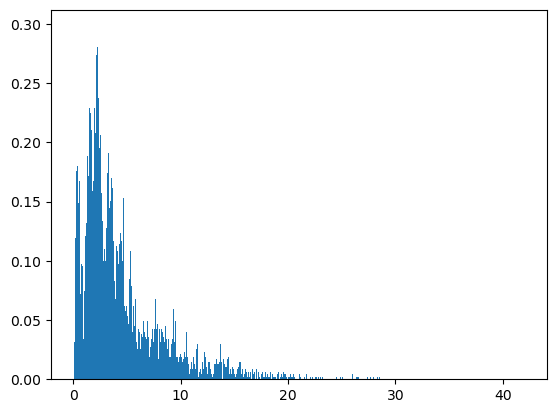

In [57]:
summer = time_toground(ds.beached[18000:31000],ds.time[18000:31000])
#summer2 = time_toground(ds2.beached[23000:35000],ds2.time[23000:35000])

#summer = np.append(summer,summer2)
#summerhist = plt.hist(summer,bins = np.linspace(0,1000,1000))
summerhist = plt.hist(summer/24,bins = np.linspace(0,42,1000),density=True)
summer_rate = np.cumsum(summerhist[0])/np.cumsum(summerhist[0])[-1]

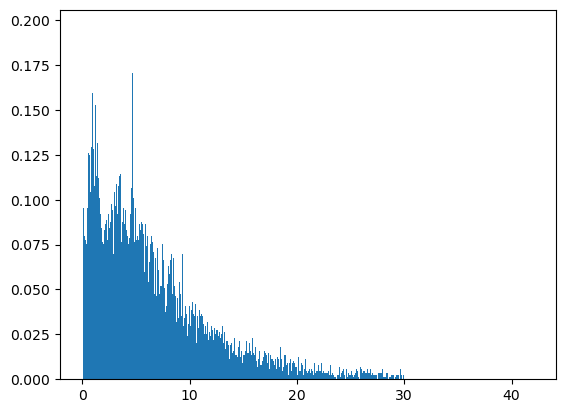

In [52]:
winter = time_toground(ds.beached[45000:],ds.time[45000:])
winter2 = time_toground(ds2.beached[:12000],ds2.time[:12000])

winter = np.append(winter,winter2)
#winterhist = plt.hist(winter,bins = np.linspace(0,1000,1000))
winterhist = plt.hist(winter/24,bins = np.linspace(0,42,1000),density=True)
winter_rate = np.cumsum(winterhist[0])/np.cumsum(winterhist[0])[-1]

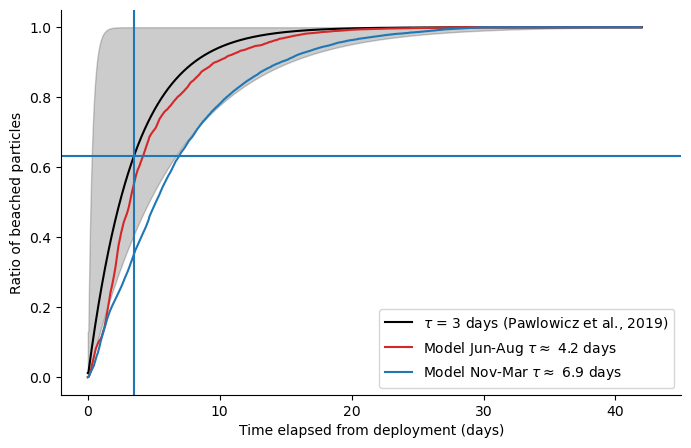

In [63]:
time2 = np.linspace(0,24*42,1000)

#alpha = 1/(3*24) 
alpha = 1/(3.5*24) 
alphaM = 1/(6.7*24)
alpham = 1/(0.3*24)

alphasM = 1/(1.2*24)
alphasm = 1/(5.3*24) 

alphawM = 1/(2.2*24)
alphawm = 1/(9.2*24) 

p = alpha * (np.exp(-alpha*time2))
p2 = alphaM * (np.exp(-alphaM*time2))
p3 = alpham * (np.exp(-alpham*time2))

psm = alphasm * (np.exp(-alphasm*time2))
psM = alphasM * (np.exp(-alphasM*time2))

pwm = alphawm * (np.exp(-alphawm*time2))
pwM = alphawM * (np.exp(-alphawM*time2))

pn =[p[0]]
pn2 =[p2[0]]
pn3 =[p3[0]]
pnsm=[psm[0]]
pnsM=[psM[0]]
pnwm=[pwm[0]]
pnwM=[pwM[0]]

for i in range(1,len(time2)):
     pn.append(np.sum(p[:i]))
     pn2.append(np.sum(p2[:i]))
     pn3.append(np.sum(p3[:i]))
     pnsm.append(np.sum(psm[:i]))
     pnsM.append(np.sum(psM[:i]))
     pnwm.append(np.sum(pwm[:i]))
     pnwM.append(np.sum(pwM[:i]))

pn3 = [i/pn3[-1] for i in pn3]
pn2= [i/pn2[-1] for i in pn2]
pn = [i/pn[-1] for i in pn]
pnsm = [i/pnsm[-1] for i in pnsm]
pnsM = [i/pnsM[-1] for i in pnsM]
pnwm = [i/pnwm[-1] for i in pnwm]
pnwM = [i/pnwM[-1] for i in pnwM]

fig,ax=plt.subplots(1,1,figsize=(8,5))
plt.plot(time2/24,pn,'-',color = 'k',label=r'$\tau$ = 3 days (Pawlowicz et al., 2019)' )
plt.plot(time2[:-1]/24,summer_rate,label=r'Model Jun-Aug $ \tau \approx$ 4.2 days',c='tab:red')
plt.plot(time2[:-1]/24,winter_rate,label=r'Model Nov-Mar $ \tau \approx$ 6.9 days',c='tab:blue')

#plt.plot(b2,label='Kh = 1.5 without stokes drift')

# plt.plot(time2/24,pnwM,'--',c='tab:blue')
# plt.plot(time2/24,pnwm,'--',c='tab:blue')
# plt.plot(time2/24,pnsM,'--',c='tab:red')
# plt.plot(time2/24,pnsm,'--',c='tab:red')
#ax.fill_between(time2/24,pnsM,pnsm, color='red', alpha=.1)
#ax.fill_between(time2/24,pnwM,pnwm, color='blue', alpha=.1)
ax.fill_between(time2/24,pn2,pn3, color='k', alpha=.2)

plt.legend(loc = 4)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.xlabel('Time elapsed from deployment (days)')
plt.ylabel('Ratio of beached particles')
plt.axvline(x=3.5)
plt.xlim([-2,45])
plt.axhline(y=1-np.exp(-1))

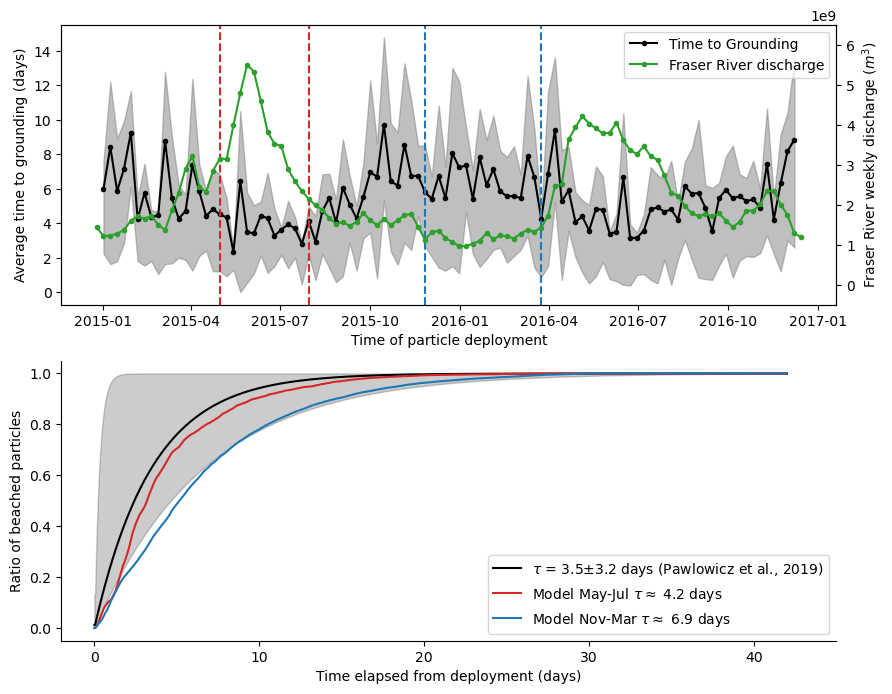

In [67]:
df3['ttg']=(df3.Timeg-df3.DeployT)/ np.timedelta64(1, 'D')
month_mean1 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].mean())
month_Q11 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.25))
month_Q31 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.75))

df4['ttg']=(df4.Timeg-df4.DeployT)/ np.timedelta64(1, 'D')
month_mean2 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].mean())
month_Q12 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.25))
month_Q32 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.75))

month_mean = np.append(month_mean1,month_mean2)
Q1 = np.append(month_Q11,month_Q12)
Q3 = np.append(month_Q31,month_Q32)

xx = []
start = datetime(2014,12,25)
for i in range(104):
    xx.append(start+ timedelta(days= i*7))
xx = np.array(xx, dtype='datetime64')

fig,ax = plt.subplots(2,1,figsize=(10,8))

Twin1 = ax[0].twinx()
p1 =ax[0].plot(xx[1:-1],month_mean ,'.-',c='k',label = 'Time to Grounding')
p2 =ax[0].fill_between(xx[1:-1],Q1,Q3,color = 'grey',alpha=0.5)
p3 = Twin1.plot(xx,Fraser_week,'.-',c='tab:green',label = 'Fraser River discharge')
Twin1.set_ylim([-5e8,6.5e9])
AX1 = p1+p3
labs = [l.get_label() for l in AX1]
ax[0].legend(AX1,labs)

ax[0].set_xlabel('Time of particle deployment')
ax[0].set_ylabel('Average time to grounding (days)')

ax[0].axvline(x = xx[18],linestyle='--',color='tab:red')
ax[0].axvline(x = xx[31],linestyle='--',color='tab:red')

ax[0].axvline(x = xx[48],linestyle='--',color='tab:blue')
ax[0].axvline(x = xx[65],linestyle='--',color='tab:blue')

Twin1.set_ylabel('Fraser River weekly discharge ($m^3$)')

ax[1].plot(time2/24,pn,'-',color = 'k',label=r'$\tau$ = 3.5$\pm 3.2$ days (Pawlowicz et al., 2019)' )
ax[1].plot(time2[:-1]/24,summer_rate,label=r'Model May-Jul $ \tau \approx$ 4.2 days',c='tab:red')
ax[1].plot(time2[:-1]/24,winter_rate,label=r'Model Nov-Mar $ \tau \approx$ 6.9 days',c='tab:blue')


ax[1].fill_between(time2/24,pn2,pn3, color='k', alpha=.2)

ax[1].legend(loc = 4)
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].set_xlabel('Time elapsed from deployment (days)')
ax[1].set_ylabel('Ratio of beached particles')
# plt.axvline(x=6.9)
ax[1].set_xlim([-2,45])
fig.savefig('beaching.pdf')


In [8]:
from dateutil.relativedelta import relativedelta

In [9]:
date_i = datetime(2015,1,1)
Fraser_month = [] 
for i in range(24):
    Fraser_month.append(0)
    date_fin = date_i + relativedelta(months=1)
    while date_i < date_fin:
        Fraser_month[-1] += float(xr.open_dataset(get_Fraser_path(date_i + timedelta(hours=1))).rorunoff[0,500,394].values)*211.8116*3600 #m3/h
        date_i += timedelta(hours=1)

In [23]:
month_Q31

array([10.625     ,  5.70833333,  9.        ,  7.33333333,  6.20833333,
        5.33333333,  4.58333333,  6.08333333,  7.45833333, 10.91666667,
        9.83333333,  9.54166667])

In [24]:
( 9.88541667+8.66666667+8+9.83333333+9.54166667)/5

9.185416667999998

Text(0, 0.5, 'Fraser river weekly discharge ($m^3$)')

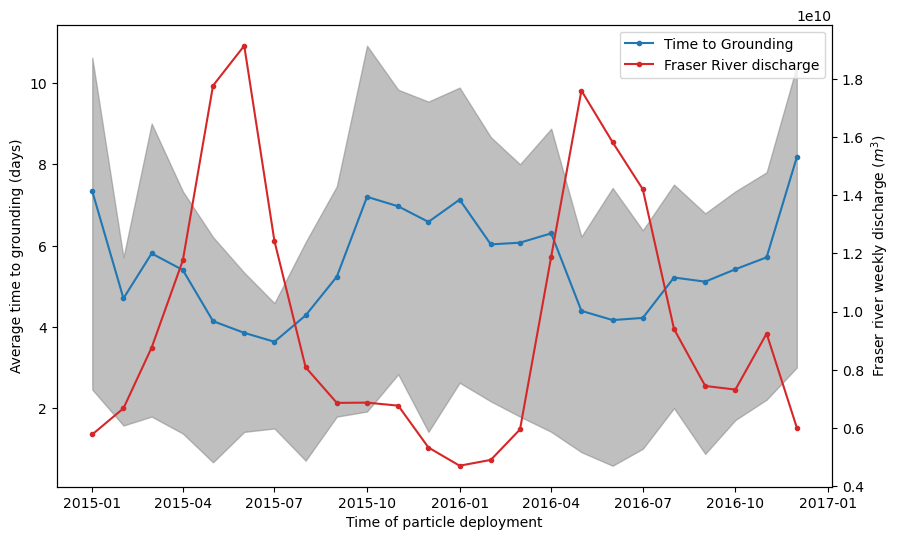

In [11]:
df3['ttg']=(df3.Timeg-df3.DeployT)/ np.timedelta64(1, 'D')
month_mean1 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].mean())
month_Q11 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].quantile(0.25))
month_Q31 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].quantile(0.75))

df4['ttg']=(df4.Timeg-df4.DeployT)/ np.timedelta64(1, 'D')
month_mean2 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].mean())
month_Q12 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].quantile(0.25))
month_Q32 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].quantile(0.75))

month_mean = np.append(month_mean1,month_mean2)
Q1 = np.append(month_Q11,month_Q12)
Q3 = np.append(month_Q31,month_Q32)

xx = []
start = datetime(2015,1,1)
for i in range(24):
    xx.append(start+ relativedelta(months=i))
xx = np.array(xx, dtype='datetime64')

fig,ax = plt.subplots(1,1,figsize=(10,6))

Twin1 = ax.twinx()
p1 =ax.plot(xx,month_mean,'.-',label = 'Time to Grounding')
p2 =ax.fill_between(xx,Q1,Q3,color = 'grey',alpha=0.5)
p3 = Twin1.plot(xx,Fraser_month,'.-',c='tab:red',label = 'Fraser River discharge')

AX1 = p1+p3
labs = [l.get_label() for l in AX1]
ax.legend(AX1,labs)

ax.set_xlabel('Time of particle deployment')
ax.set_ylabel('Average time to grounding (days)')
Twin1.set_ylabel('Fraser river weekly discharge ($m^3$)')

In [168]:
month_mean

array([7.33738333, 4.70026042, 5.80635417, 5.398025  , 4.14036458,
       3.85232292, 3.63323333, 4.28179167, 5.23459375, 7.19886667,
       6.96498958, 6.58216667, 7.13035   , 6.02840625, 6.0711875 ,
       6.30041667, 4.3931875 , 4.16639583, 4.22015833, 5.213625  ,
       5.11164167, 5.41707292, 5.7104375 , 8.17208333])

In [174]:
month_mean

array([7.33738333, 4.70026042, 5.80635417, 5.398025  , 4.14036458,
       3.85232292, 3.63323333, 4.28179167, 5.23459375, 7.19886667,
       6.96498958, 6.58216667, 7.13035   , 6.02840625, 6.0711875 ,
       6.30041667, 4.3931875 , 4.16639583, 4.22015833, 5.213625  ,
       5.11164167, 5.41707292, 5.7104375 , 8.17208333])

In [176]:
(np.mean(month_mean[:2])+np.mean(month_mean[12:15]))/2

6.2144015625

In [177]:
(np.mean(month_mean[5:8])+np.mean(month_mean[17:20]))/2

4.227921180555556